# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [4]:
# Import necessary modules
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
from splinter.driver.webdriver import BaseWebDriver

# Configure Chrome options
options = Options()
options.add_argument('--start-maximized')  # You can add more options if needed

# Specify the path to ChromeDriver
driver_path = r'C:\Users\aristah\Downloads\chromedriver-win64\chromedriver.exe'

# Create a Service object for ChromeDriver
service = Service(executable_path=driver_path)

# Initialize Selenium WebDriver with the service and options
driver = webdriver.Chrome(service=service, options=options)

# Initialize Splinter's browser using the Selenium WebDriver
browser = BaseWebDriver(driver)






In [5]:
# Initialize Splinter's browser using the Selenium WebDriver
browser = BaseWebDriver(driver)


### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [6]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [7]:
# Create a BeautifulSoup object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')


In [8]:
# Extract all rows of data
# Find the table in the HTML
table = soup.find('table')

# Extract the table header
headers = [header.get_text() for header in table.find_all('th')]

# Extract the table rows
rows = []
for row in table.find_all('tr')[1:]:  # Skip the header row
    cols = row.find_all('td')
    cols = [col.get_text(strip=True) for col in cols]
    rows.append(cols)

# Print headers and rows for verification
print("Headers:", headers)
print("Rows:")
for row in rows:
    print(row)

Headers: ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
Rows:
['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0']
['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0']
['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0']
['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0']
['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0']
['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0']
['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0']
['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0']
['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0']
['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0']
['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0']
['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0']
['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0']
['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0']
['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0']
['170', '2012-09-03', '28', '165', '6', '-75.0', '7

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [9]:
# Create an empty list to store rows
rows = []

# Extract the table header
headers = [header.get_text() for header in table.find_all('th')]

# Loop through the scraped data to create a list of rows
for row in table.find_all('tr')[1:]:  # Skip the header row
    cols = row.find_all('td')
    cols = [col.get_text(strip=True) for col in cols]
    rows.append(cols)


In [10]:
# Create a Pandas DataFrame using the list of rows and column names
df = pd.DataFrame(rows, columns=headers)


In [11]:
# Confirm DataFrame was created successfully
print(df)


        id terrestrial_date   sol   ls month min_temp pressure
0        2       2012-08-16    10  155     6    -75.0    739.0
1       13       2012-08-17    11  156     6    -76.0    740.0
2       24       2012-08-18    12  156     6    -76.0    741.0
3       35       2012-08-19    13  157     6    -74.0    732.0
4       46       2012-08-20    14  157     6    -74.0    740.0
...    ...              ...   ...  ...   ...      ...      ...
1862  1889       2018-02-23  1973  133     5    -78.0    730.0
1863  1892       2018-02-24  1974  134     5    -77.0    729.0
1864  1894       2018-02-25  1975  134     5    -76.0    729.0
1865  1893       2018-02-26  1976  135     5    -77.0    728.0
1866  1895       2018-02-27  1977  135     5    -77.0    727.0

[1867 rows x 7 columns]


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [12]:
# Examine the data types of each column
print(df.dtypes)



id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [13]:
# Change data types for data analysis
# Convert 'terrestrial_date' to datetime
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'], format='%Y-%m-%d', errors='coerce')

# Convert 'sol' and 'month' to integer
df['sol'] = pd.to_numeric(df['sol'], errors='coerce').astype('Int64')  # Use 'Int64' to handle NaN values
df['month'] = pd.to_numeric(df['month'], errors='coerce').astype('Int64')

# Convert 'min_temp' and 'pressure' to float
df['min_temp'] = pd.to_numeric(df['min_temp'], errors='coerce')
df['pressure'] = pd.to_numeric(df['pressure'], errors='coerce')



In [14]:
# Confirm type changes were successful by examining data types again
print("\nData types after conversion:")
print(df.dtypes)


Data types after conversion:
id                          object
terrestrial_date    datetime64[ns]
sol                          Int64
ls                          object
month                        Int64
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [15]:
# 1. How many months are there on Mars?
# Count the number of unique Martian months
num_months = df['month'].nunique()
print(f"Number of unique Martian months: {num_months}")


Number of unique Martian months: 12


In [16]:
# 2. How many sols (Martian days) worth of data are there?
# Count the number of unique sols in the dataset
num_sols = df['sol'].nunique()
print(f"Number of unique Martian days (sols) in the dataset: {num_sols}")



Number of unique Martian days (sols) in the dataset: 1867


In [17]:
# 3. What is the average minimum temperature by month?

# Convert 'min_temp' to numeric, as it might be in string format
df['min_temp'] = pd.to_numeric(df['min_temp'], errors='coerce')

# Group by month and calculate the average minimum temperature
avg_temp_by_month = df.groupby('month')['min_temp'].mean()

# Print the result
print(avg_temp_by_month)


month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


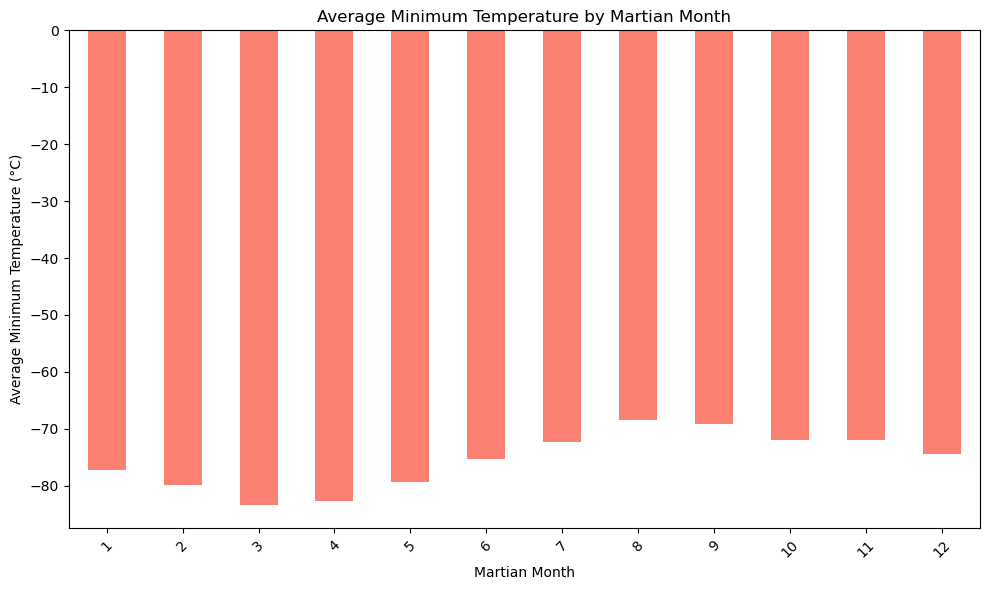

In [18]:
# Plot the average minimum temperature by month

import matplotlib.pyplot as plt

# Convert 'min_temp' to numeric, as it might be in string format
df['min_temp'] = pd.to_numeric(df['min_temp'], errors='coerce')

# Group by month and calculate the average minimum temperature
avg_min_temp_by_month = df.groupby('month')['min_temp'].mean()

# Plot the average minimum temperature by month
plt.figure(figsize=(10, 6))
avg_min_temp_by_month.plot(kind='bar', color='salmon')
plt.title('Average Minimum Temperature by Martian Month')
plt.xlabel('Martian Month')
plt.ylabel('Average Minimum Temperature (°C)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Coldest Month: 3 with an average minimum temperature of -83.31°C
Hottest Month: 8 with an average minimum temperature of -68.38°C


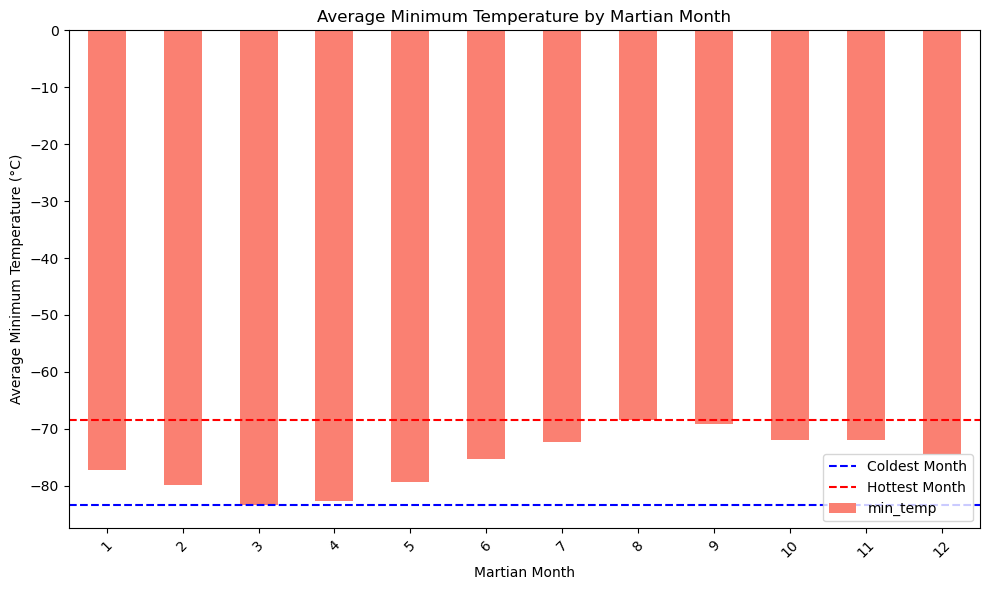

In [19]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph

# Convert 'min_temp' to numeric, if it's not already
df['min_temp'] = pd.to_numeric(df['min_temp'], errors='coerce')

# Group by month and calculate the average minimum temperature
avg_min_temp_by_month = df.groupby('month')['min_temp'].mean()

# Sort the average temperatures to find the coldest and hottest months
sorted_avg_min_temp = avg_min_temp_by_month.sort_values()

# Identify the coldest and hottest months
coldest_month = sorted_avg_min_temp.idxmin()
hottest_month = sorted_avg_min_temp.idxmax()
coldest_temp = sorted_avg_min_temp.min()
hottest_temp = sorted_avg_min_temp.max()

# Print the results
print(f"Coldest Month: {coldest_month} with an average minimum temperature of {coldest_temp:.2f}°C")
print(f"Hottest Month: {hottest_month} with an average minimum temperature of {hottest_temp:.2f}°C")

# Plot the average minimum temperature by month
plt.figure(figsize=(10, 6))
avg_min_temp_by_month.plot(kind='bar', color='salmon')
plt.title('Average Minimum Temperature by Martian Month')
plt.xlabel('Martian Month')
plt.ylabel('Average Minimum Temperature (°C)')
plt.xticks(rotation=45)
plt.tight_layout()

# Highlight the coldest and hottest months in the plot
plt.axhline(coldest_temp, color='blue', linestyle='--', label='Coldest Month')
plt.axhline(hottest_temp, color='red', linestyle='--', label='Hottest Month')
plt.legend()

plt.show()


month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


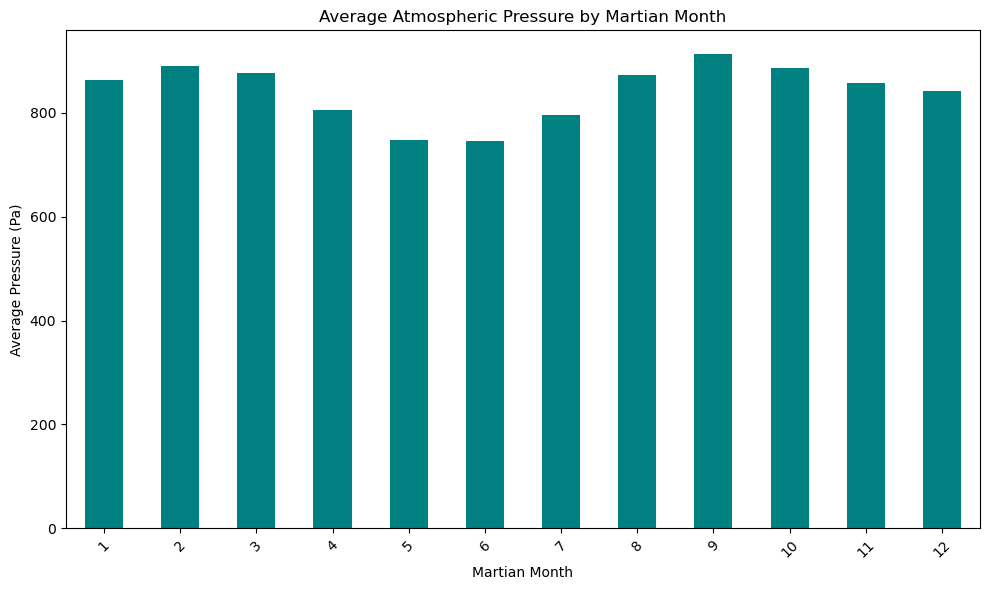

In [20]:
# 4. What is the average pressure by month?

# Convert 'pressure' to numeric, if it's not already
df['pressure'] = pd.to_numeric(df['pressure'], errors='coerce')

# Group by month and calculate the average pressure
avg_pressure_by_month = df.groupby('month')['pressure'].mean()

# Print the average pressure by month
print(avg_pressure_by_month)

# Plot the average pressure by month
plt.figure(figsize=(10, 6))
avg_pressure_by_month.plot(kind='bar', color='teal')
plt.title('Average Atmospheric Pressure by Martian Month')
plt.xlabel('Martian Month')
plt.ylabel('Average Pressure (Pa)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


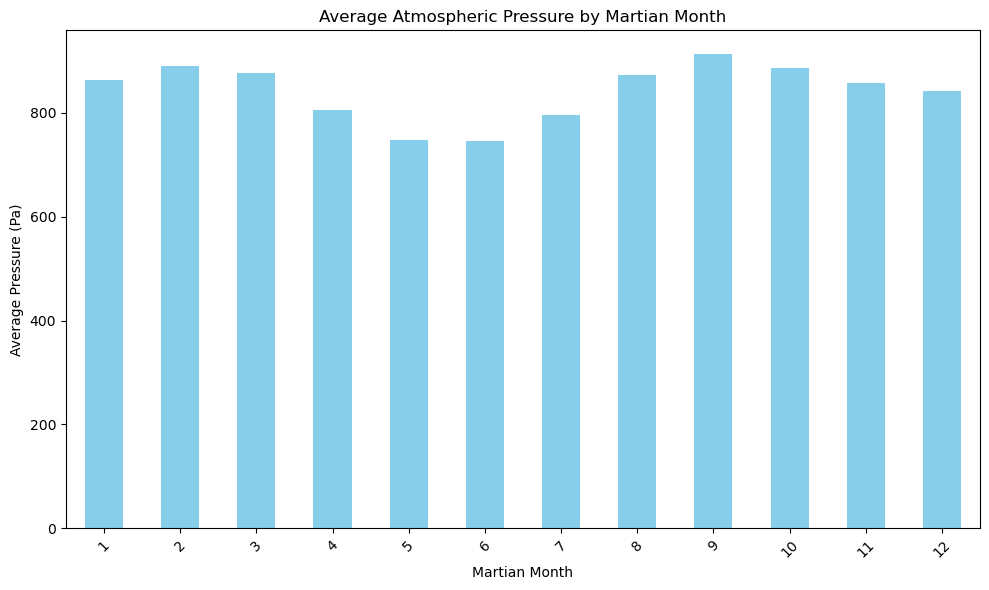

In [21]:
# Plot the average pressure by month
# Assuming df is your DataFrame and the 'pressure' column has been converted to numeric
df['pressure'] = pd.to_numeric(df['pressure'], errors='coerce')

# Group by 'month' and calculate the average pressure
avg_pressure_by_month = df.groupby('month')['pressure'].mean()

# Plot the average pressure by month
plt.figure(figsize=(10, 6))
avg_pressure_by_month.plot(kind='bar', color='skyblue')
plt.title('Average Atmospheric Pressure by Martian Month')
plt.xlabel('Martian Month')
plt.ylabel('Average Pressure (Pa)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Month with the lowest pressure: 6 (745.05 Pa)
Month with the highest pressure: 9 (913.31 Pa)


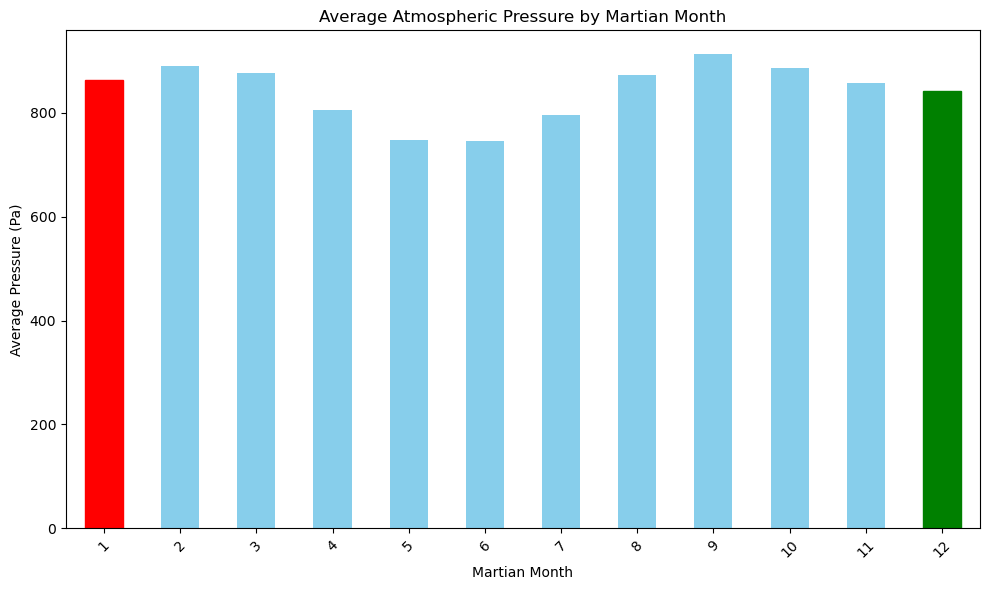

In [22]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
# Sort the average pressure by month in ascending order
sorted_pressure_by_month = avg_pressure_by_month.sort_values()

# Get the month with the lowest and highest pressure
lowest_pressure_month = sorted_pressure_by_month.idxmin()
highest_pressure_month = sorted_pressure_by_month.idxmax()
lowest_pressure_value = sorted_pressure_by_month.min()
highest_pressure_value = sorted_pressure_by_month.max()

# Print the results
print(f"Month with the lowest pressure: {lowest_pressure_month} ({lowest_pressure_value:.2f} Pa)")
print(f"Month with the highest pressure: {highest_pressure_month} ({highest_pressure_value:.2f} Pa)")

# Plot the average pressure by month with highlighted lowest and highest pressures
plt.figure(figsize=(10, 6))
ax = avg_pressure_by_month.plot(kind='bar', color='skyblue')

# Highlight the lowest and highest pressure bars
ax.patches[sorted_pressure_by_month.index.get_loc(lowest_pressure_month)].set_color('red')
ax.patches[sorted_pressure_by_month.index.get_loc(highest_pressure_month)].set_color('green')

plt.title('Average Atmospheric Pressure by Martian Month')
plt.xlabel('Martian Month')
plt.ylabel('Average Pressure (Pa)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


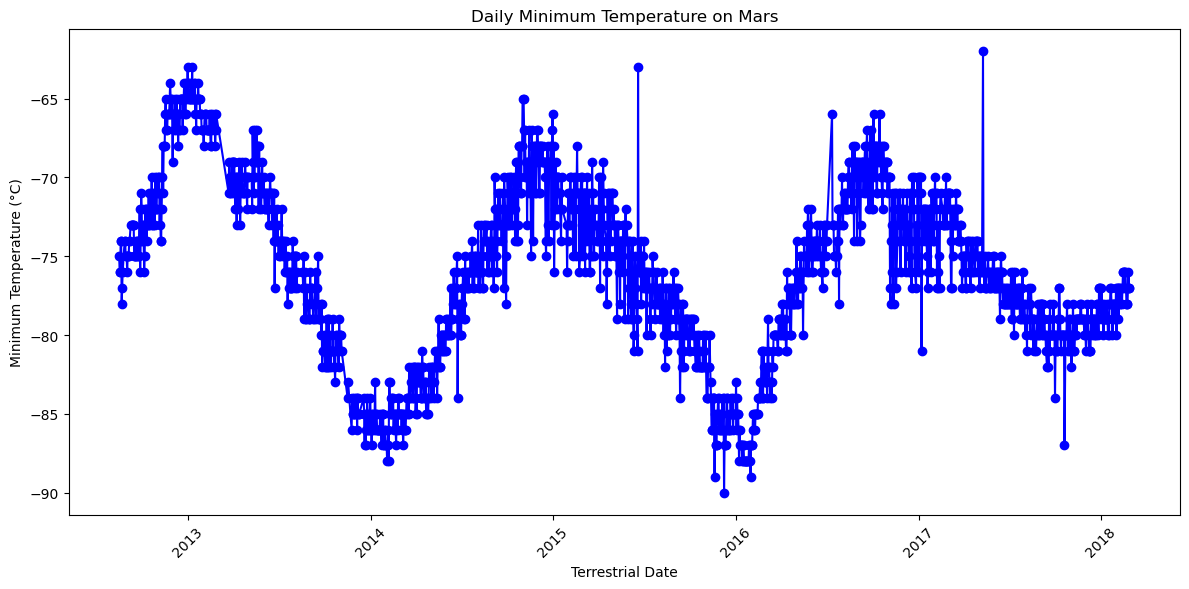

In [23]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
# Plot the daily minimum temperature to estimate the Martian year length in Earth days
plt.figure(figsize=(12, 6))
plt.plot(df['terrestrial_date'], df['min_temp'], marker='o', linestyle='-', color='b')
plt.title('Daily Minimum Temperature on Mars')
plt.xlabel('Terrestrial Date')
plt.ylabel('Minimum Temperature (°C)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



#### Minimum Temperature

Coldest Month: 3 with an average minimum temperature of -83.31°C
Hottest Month: 8 with an average minimum temperature of -68.38°C

#### Atmospheric Pressure

Month with the lowest pressure: 6 (745.05 Pa)
Month with the highest pressure: 9 (913.31 Pa)

#### Year Length

3 YEARS

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [25]:
# Write the data to a CSV
# Define the path for the CSV file
csv_file_path = 'mars_temperature_data.csv'

# Write the DataFrame to a CSV file
df.to_csv(csv_file_path, index=False)

print(f'Data has been written to {csv_file_path}')


Data has been written to mars_temperature_data.csv


In [22]:
browser.quit()